In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the datasets
customers_url = "https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE"
products_url = "https://drive.google.com/uc?id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0"
transactions_url = "https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF"

customers_df = pd.read_csv(customers_url)
products_df = pd.read_csv(products_url)
transactions_df = pd.read_csv(transactions_url)

# Inspecting datasets
print("Customers Dataset Overview:")
print(customers_df.info())
print("\nProducts Dataset Overview:")
print(products_df.info())
print("\nTransactions Dataset Overview:")
print(transactions_df.info())

# Cleaning data
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# Check for duplicates
duplicates_info = {
    "Customers Duplicates": customers_df.duplicated().sum(),
    "Products Duplicates": products_df.duplicated().sum(),
    "Transactions Duplicates": transactions_df.duplicated().sum()
}
print("\nDuplicate Entries:", duplicates_info)

# Check for missing values
missing_values = {
    "Customers Missing": customers_df.isnull().sum(),
    "Products Missing": products_df.isnull().sum(),
    "Transactions Missing": transactions_df.isnull().sum()
}
print("\nMissing Values:", missing_values)


Customers Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 colu

In [7]:
# Setting seaborn style for visualizations
sns.set(style="whitegrid")

# 1. Distribution of customers by region
customers_by_region = customers_df['Region'].value_counts()

# 2. Top 5 most purchased products by quantity
top_products = transactions_df.groupby('ProductID')['Quantity'].sum().nlargest(5).reset_index()
top_products = top_products.merge(products_df[['ProductID', 'ProductName']], on='ProductID')

# 3. Monthly sales trend (total transaction value by month)
transactions_df['MonthYear'] = transactions_df['TransactionDate'].dt.to_period('M')
monthly_sales = transactions_df.groupby('MonthYear')['TotalValue'].sum().reset_index()

# 4. Distribution of product categories
category_distribution = products_df['Category'].value_counts()

# 5. Most active customers (top 5 by total transaction value)
customer_activity = transactions_df.groupby('CustomerID')['TotalValue'].sum().nlargest(5).reset_index()
customer_activity = customer_activity.merge(customers_df[['CustomerID', 'CustomerName']], on='CustomerID')


<ipython-input-8-56f364af295a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customers_by_region.index, y=customers_by_region.values, palette="viridis")
<ipython-input-8-56f364af295a>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products['ProductName'], y=top_products['Quantity'], palette="plasma")
<ipython-input-8-56f364af295a>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_distribution.index, y=category_distribution.values, palette="coolwarm")


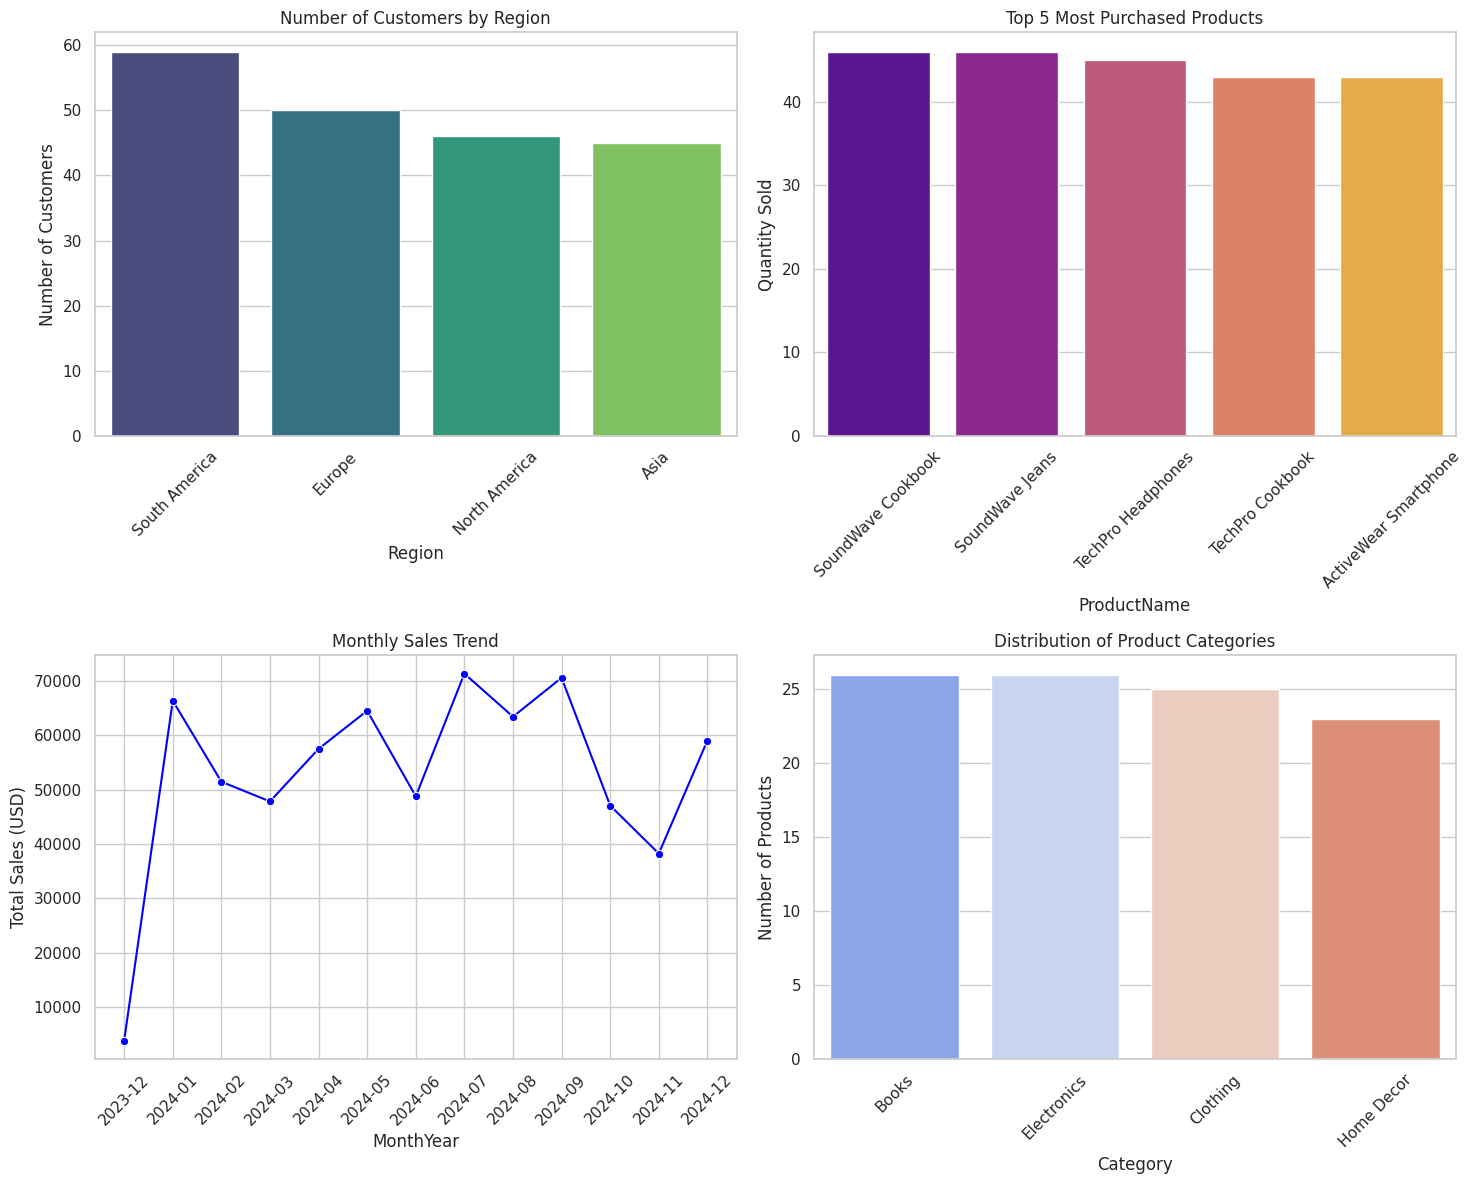

In [8]:
# Plotting the results
plt.figure(figsize=(15, 12))

# Customers by region
plt.subplot(2, 2, 1)
sns.barplot(x=customers_by_region.index, y=customers_by_region.values, palette="viridis")
plt.title("Number of Customers by Region")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)

# Top 5 products by quantity
plt.subplot(2, 2, 2)
sns.barplot(x=top_products['ProductName'], y=top_products['Quantity'], palette="plasma")
plt.title("Top 5 Most Purchased Products")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)

# Monthly sales trend
plt.subplot(2, 2, 3)
sns.lineplot(x=monthly_sales['MonthYear'].astype(str), y=monthly_sales['TotalValue'], marker="o", color="blue")
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales (USD)")
plt.xticks(rotation=45)

# Distribution of product categories
plt.subplot(2, 2, 4)
sns.barplot(x=category_distribution.index, y=category_distribution.values, palette="coolwarm")
plt.title("Distribution of Product Categories")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [9]:
# Displaying top customers
customer_activity.rename(columns={'TotalValue': 'Total Spent'}, inplace=True)
print("Most Active Customers (Top 5):")
print(customer_activity)


Most Active Customers (Top 5):
  CustomerID  Total Spent   CustomerName
0      C0141     10673.87   Paul Parsons
1      C0054      8040.39   Bruce Rhodes
2      C0065      7663.70   Gerald Hines
3      C0156      7634.45  William Adams
4      C0082      7572.91   Aimee Taylor
